<a href="https://colab.research.google.com/github/Pratzybha/CS252-OS-PROJECT/blob/main/finalCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing essential Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Data augmentation
from sklearn.preprocessing import LabelEncoder #Categorical to numerical reprentation
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

#  Extracting frames and labelling them for training


In [ ]:

def process_videos_train(video_path, output_folder, crop_percent, brightness_thresholds):
    image_data = {}  # Dictionary to hold image names and labels

    cap = cv2.VideoCapture(video_path) #Read the video frame by frame

    frame_count = 0
    while True:
        ret, frame = cap.read() #Reads the next frame from the video and returns two values
        if not ret:
            break

        if frame_count % (3 * cap.get(cv2.CAP_PROP_FPS)) == 0:  # Extract every 3 seconds

            # Crop
            height, width = frame.shape[:2]
            crop_amount = int(crop_percent * min(height, width))
            frame = frame[crop_amount:-crop_amount, crop_amount:-crop_amount] #Crops the frame by the calculated amount from all sides using array slicing in NumPy.

            # Greyscale conversion
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Brightness Calculation
            avg_brightness = gray_frame.mean()

            # Labeling
            if avg_brightness < brightness_thresholds[0]:
                label = 2
            elif avg_brightness < brightness_thresholds[1]:
                label = 1
            else:
                label = 0

            # Save image in 'test' folder
            output_filename = f"{os.path.splitext(os.path.basename(video_path))[0]}_{frame_count}_{label}.jpg"
            output_path = os.path.join(output_folder, "train", output_filename)  # Store in 'train'
            os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create 'test' folder if needed
            cv2.imwrite(output_path, frame)

            # Add to dictionary
            image_data[output_filename] = label

        frame_count += 1

    cap.release()
    return image_data


# Parameters
output_folder = "/content/drive/MyDrive/soft computing"
crop_percent = 0.2
brightness_threshold1 = 170
brightness_threshold2 = 181

# Get video path from the user
video_path = "/content/drive/MyDrive/soft computing/video_file1.avi"





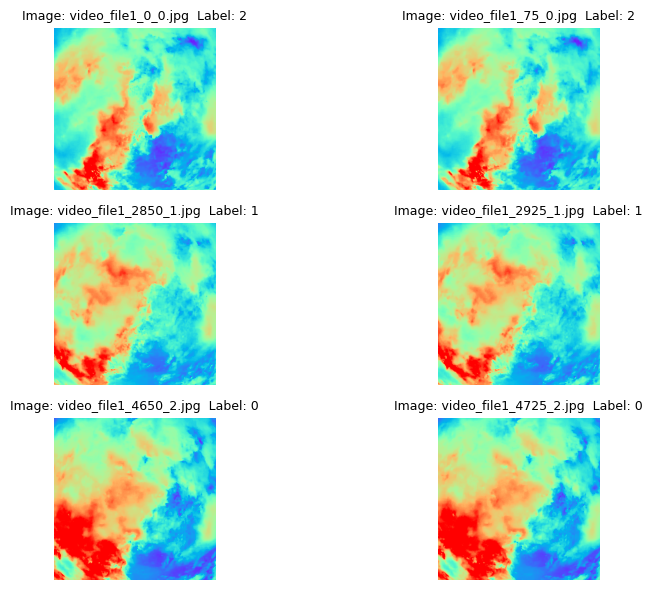

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Parameters (adjust if needed)
output_folder = "/content/drive/MyDrive/soft computing"

# Image details
image_data = {
    "video_file1_0_0.jpg": 2,
    "video_file1_75_0.jpg": 2,
    "video_file1_2850_1.jpg": 1,
    "video_file1_2925_1.jpg": 1,
    "video_file1_4650_2.jpg": 0,
    "video_file1_4725_2.jpg": 0
}

# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axes = axes.flatten()

for i, (filename, label) in enumerate(image_data.items()):
    image_path = os.path.join(output_folder, "train", filename)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.uint8)  # Convert for imshow

    axes[i].imshow(img, cmap='rainbow')  # Use 'gray' cmap for grayscale images
    axes[i].set_title(f"Image: {filename}  Label: {label}", fontsize=9)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Total brightness values of all images: [164.19937849633487, 164.0367085021219, 164.1509090470679, 164.04780635127315, 164.05585997781637, 164.16535252700618, 164.22247540509258, 164.35036892361111, 164.38525993441357, 164.45442708333334, 164.69797393422067, 164.81310281635803, 164.99787205825618, 165.1202950183256, 165.2493851273148, 165.38099802276236, 165.49711853780863, 165.65656647858796, 165.8186969521605, 165.8245804398148, 165.9805862991898, 166.19075520833334, 166.3678294994213, 166.5328414351852, 166.834774064429, 166.980037736304, 167.18461853780863, 167.42369851948303, 167.64076967592592, 167.79090711805554, 168.05444034529322, 168.20133162133487, 168.49250096450618, 168.84447337962962, 169.067684220679, 169.29429494598764, 169.5863293306327, 169.92570288387347, 170.22041377314815, 170.54899389949847, 170.85078185281637, 171.21736955054013, 171.732120466821, 172.08890034239968, 172.53124397183643, 172.8712112991898, 173.4914912471065, 174.02305471161264, 174.4759174864969, 1

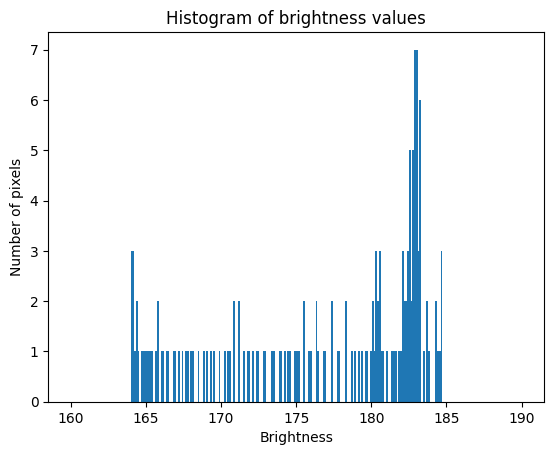

In [ ]:
# prompt:  print total brightness values of all images as a list and plot the histogram

import matplotlib.pyplot as plt
brightness_values = []
for filename, label in image_data_train.items():
    image_path = os.path.join(output_folder, "train", filename)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    brightness_values.append(img.mean())

print("Total brightness values of all images:", brightness_values)

plt.hist(brightness_values, bins=256, range=(160, 190))
plt.xlabel("Brightness")
plt.ylabel("Number of pixels")
plt.title("Histogram of brightness values")
plt.show()


In [ ]:

# Count label occurrences
label_counts = {}
for filename, label in image_data_train.items():
    if label not in label_counts:
        label_counts[label] = 0
    label_counts[label] += 1

# Print the label counts
print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")
print(image_data_train)


Label Counts:
0: 38
1: 60
2: 62
{'video_file1_0_0.jpg': 0, 'video_file1_75_0.jpg': 0, 'video_file1_150_0.jpg': 0, 'video_file1_225_0.jpg': 0, 'video_file1_300_0.jpg': 0, 'video_file1_375_0.jpg': 0, 'video_file1_450_0.jpg': 0, 'video_file1_525_0.jpg': 0, 'video_file1_600_0.jpg': 0, 'video_file1_675_0.jpg': 0, 'video_file1_750_0.jpg': 0, 'video_file1_825_0.jpg': 0, 'video_file1_900_0.jpg': 0, 'video_file1_975_0.jpg': 0, 'video_file1_1050_0.jpg': 0, 'video_file1_1125_0.jpg': 0, 'video_file1_1200_0.jpg': 0, 'video_file1_1275_0.jpg': 0, 'video_file1_1350_0.jpg': 0, 'video_file1_1425_0.jpg': 0, 'video_file1_1500_0.jpg': 0, 'video_file1_1575_0.jpg': 0, 'video_file1_1650_0.jpg': 0, 'video_file1_1725_0.jpg': 0, 'video_file1_1800_0.jpg': 0, 'video_file1_1875_0.jpg': 0, 'video_file1_1950_0.jpg': 0, 'video_file1_2025_0.jpg': 0, 'video_file1_2100_0.jpg': 0, 'video_file1_2175_0.jpg': 0, 'video_file1_2250_0.jpg': 0, 'video_file1_2325_0.jpg': 0, 'video_file1_2400_0.jpg': 0, 'video_file1_2475_0.jpg': 0

# **Processing second video for test cases**

In [ ]:
def process_videos_test(video_path, output_folder, crop_percent, brightness_thresholds):
    image_data = {}
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % (8 * cap.get(cv2.CAP_PROP_FPS)) == 0:  # Extract every 8 seconds

            # Crop
            height, width = frame.shape[:2]
            crop_amount = int(crop_percent * min(height, width))
            frame = frame[crop_amount:-crop_amount, crop_amount:-crop_amount] #Crops the frame by the calculated amount from all sides using array slicing in NumPy.

            # Greyscale conversion
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Brightness Calculation
            avg_brightness = gray_frame.mean()

            # Labeling
            if avg_brightness < brightness_threshold1:
                label = 0
            elif avg_brightness < brightness_threshold2:
                label = 1
            else:
                label =  2

            # Save image in 'test' folder
            output_filename = f"{os.path.splitext(os.path.basename(video_path))[0]}_{frame_count}_{label}.jpg"
            output_path = os.path.join(output_folder, "test", output_filename)  # Store in 'test'
            os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create 'test' folder if needed
            cv2.imwrite(output_path, frame)

            # Add to dictionary
            image_data[output_filename] = label

        frame_count += 1

    cap.release()
    return image_data



# Parameters
output_folder = "/content/drive/MyDrive/soft computing"  # Replace with your output folder
crop_percent = 0.2
brightness_threshold1 = 170
brightness_threshold2 = 181

# Get video path from the user
video_path = "/content/drive/MyDrive/soft computing/video_file2.avi"
# Process the video
image_data_test = process_videos_test(video_path, output_folder, crop_percent, [brightness_threshold1, brightness_threshold2])


In [ ]:
# prompt: print label counts

# Count label occurrences
label_counts_test = {}
for filename, label in image_data_test.items():
    if label not in label_counts_test:
        label_counts_test[label] = 0
    label_counts_test[label] += 1

# Print the label counts
print("Label Counts:")
for label, count in label_counts_test.items():
    print(f"{label}: {count}")


Label Counts:
2: 50
1: 10


# **Preprocessing and training of model**

Number of Images Loaded: 160
Number of Labels: 160
Epoch 1/15
16/16 [==============================] - 2s 23ms/step - loss: 2.2013 - accuracy: 0.2937
Epoch 2/15
16/16 [==============================] - 0s 19ms/step - loss: 1.0694 - accuracy: 0.4125
Epoch 3/15
16/16 [==============================] - 0s 20ms/step - loss: 1.0640 - accuracy: 0.4313
Epoch 4/15
16/16 [==============================] - 0s 21ms/step - loss: 0.9383 - accuracy: 0.5250
Epoch 5/15
16/16 [==============================] - 0s 19ms/step - loss: 0.6813 - accuracy: 0.6375
Epoch 6/15
16/16 [==============================] - 0s 20ms/step - loss: 0.5311 - accuracy: 0.7125
Epoch 7/15
16/16 [==============================] - 0s 20ms/step - loss: 0.3788 - accuracy: 0.8250
Epoch 8/15
16/16 [==============================] - 0s 20ms/step - loss: 0.2013 - accuracy: 0.9500
Epoch 9/15
16/16 [==============================] - 0s 20ms/step - loss: 0.1768 - accuracy: 0.9375
Epoch 10/15
16/16 [==============================] - 0s 20

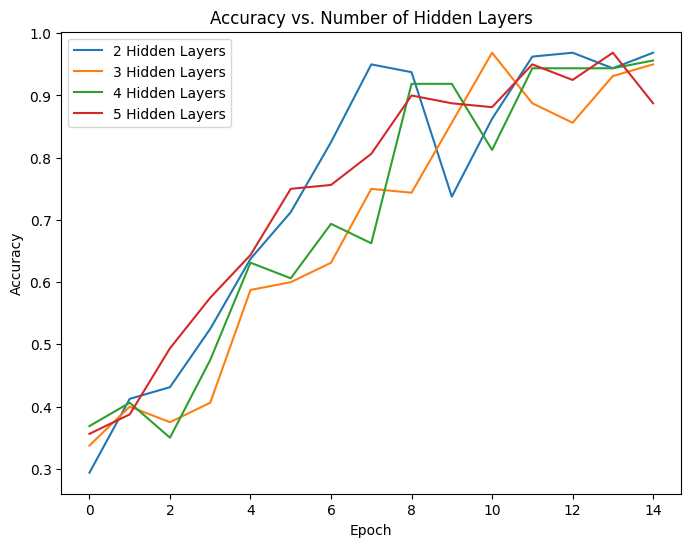

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
np.random.seed(200)
# Parameters
data_dir_train = "/content/drive/MyDrive/soft computing/train"  # Where your classified and test images are
data_dir_test = "/content/drive/MyDrive/soft computing/test"
output_folder = "/content/drive/MyDrive/soft computing"
image_data = image_data_train       # Dictionary
num_classes = 3 #The number of distinct classes in your image classification problem
batch_size = 10
learning_rate = 0.001
num_epochs = 15
img_height = 224
img_width = 224

# Load Image Data from Dictionary

def load_image_data(data_dir, image_data, img_height, img_width):
    images = []
    labels = []
    for filename, label in image_data.items():
        filepath = os.path.join(data_dir, filename) #Constructs the complete path to the image file.
        img = tf.io.read_file(filepath)
        img = tf.io.decode_image(img, channels=1)  # Grayscale
        img = tf.image.resize(img, [img_height, img_width])
        img_array = img / 255.0  # Normalize
        images.append(img_array)
        labels.append(label)

    print("Number of Images Loaded:", len(images))  # Debugging
    print("Number of Labels:", len(labels))        # Debugging `


    return images, labels


def create_model(num_hidden_layers, img_height, img_width, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        # Add hidden layers based on num_hidden_layers
        *[layers.Dense(128, activation='relu') for _ in range(num_hidden_layers)],
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load and Train
train_images, train_labels = load_image_data(data_dir_train, image_data, img_height, img_width)
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_labels = train_labels - 1  # Adjust labels if necessary
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)

# Train models with different hidden layers
results = {}
for num_hidden in [2, 3, 4, 5]:
    model = create_model(num_hidden, img_height, img_width, num_classes)
    history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size)
    results[num_hidden] = history.history['accuracy']

    # Save the model (optional)
    model.save(os.path.join(output_folder, f'image_classifier_{num_hidden}_hidden.keras'))

# Plot the results
plt.figure(figsize=(8, 6))
for num_hidden, accuracies in results.items():
    plt.plot(accuracies, label=f'{num_hidden} Hidden Layers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Hidden Layers')
plt.legend()
plt.show()


In [ ]:
import numpy as np

model = tf.keras.models.load_model('/content/drive/MyDrive/soft computing/image_classifier_4_hidden.keras')

def predict_and_print(model, data_dir_test, img_height, img_width):
    test_filenames = os.listdir(os.path.join(data_dir_test))
    print("Number of Test Images:", len(test_filenames))

    images = []
    for filename in test_filenames:
        filepath = os.path.join(data_dir_test, filename)
        img = tf.io.read_file(filepath)
        img = tf.io.decode_image(img, channels=1)
        img = tf.image.resize(img, [img_height, img_width])
        img_array = img / 255.0
        images.append(img_array)

    test_images = tf.stack(images, axis=0)
    print("Shape of Test Images Tensor:", test_images.shape)
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Print Predictions
    for i in range(len(test_filenames)):
        print(f"Image: {test_filenames[i]}, Predicted Label: {predicted_classes[i]}")

# Example Usage
predict_and_print(model, data_dir_test, img_height, img_width)  # Assuming your model is loaded



Number of Test Images: 60


Shape of Test Images Tensor: (60, 224, 224, 1)
2/2 [==============================] - 0s 11ms/step
Image: video_file2_0_2.jpg, Predicted Label: 0
Image: video_file2_200_2.jpg, Predicted Label: 0
Image: video_file2_400_2.jpg, Predicted Label: 0
Image: video_file2_600_2.jpg, Predicted Label: 0
Image: video_file2_800_2.jpg, Predicted Label: 0
Image: video_file2_1000_2.jpg, Predicted Label: 0
Image: video_file2_1200_2.jpg, Predicted Label: 0
Image: video_file2_1400_2.jpg, Predicted Label: 0
Image: video_file2_1600_1.jpg, Predicted Label: 0
Image: video_file2_1800_2.jpg, Predicted Label: 0
Image: video_file2_2000_2.jpg, Predicted Label: 0
Image: video_file2_2200_2.jpg, Predicted Label: 0
Image: video_file2_2400_2.jpg, Predicted Label: 0
Image: video_file2_2600_2.jpg, Predicted Label: 0
Image: video_file2_2800_2.jpg, Predicted Label: 0
Image: video_file2_3000_2.jpg, Predicted Label: 0
Image: video_file2_3200_2.jpg, Predicted Label: 0
Image: video_file2_3400_2.jpg, Predicted Label: 0
Image: v

Number of Test Images: 60
Shape of Test Images Tensor: (60, 224, 224, 1)
2/2 [==============================] - 0s 12ms/step
All Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Images: video_file2_0_2.jpg, video_file2_200_2.jpg; Predictions: 0, 0


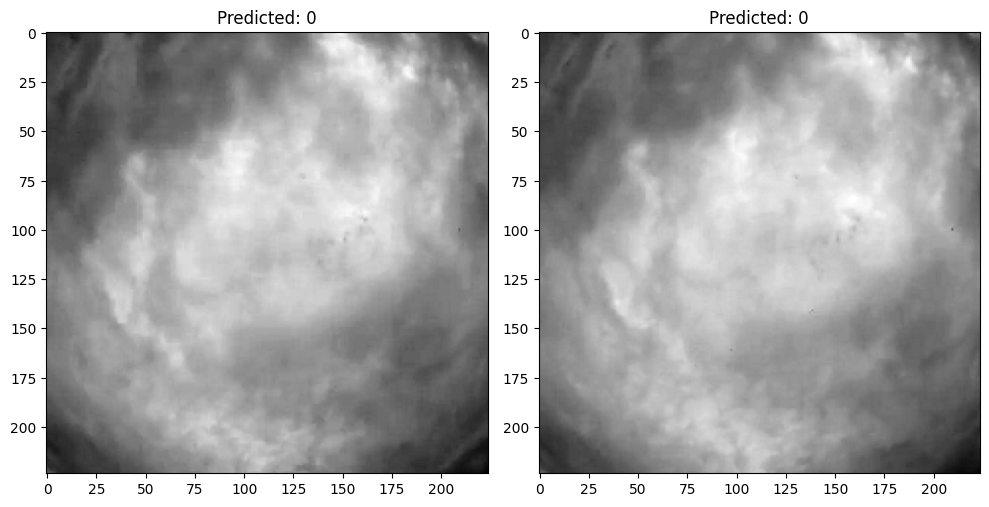

Images: video_file2_4000_2.jpg, video_file2_4200_2.jpg; Predictions: 1, 1


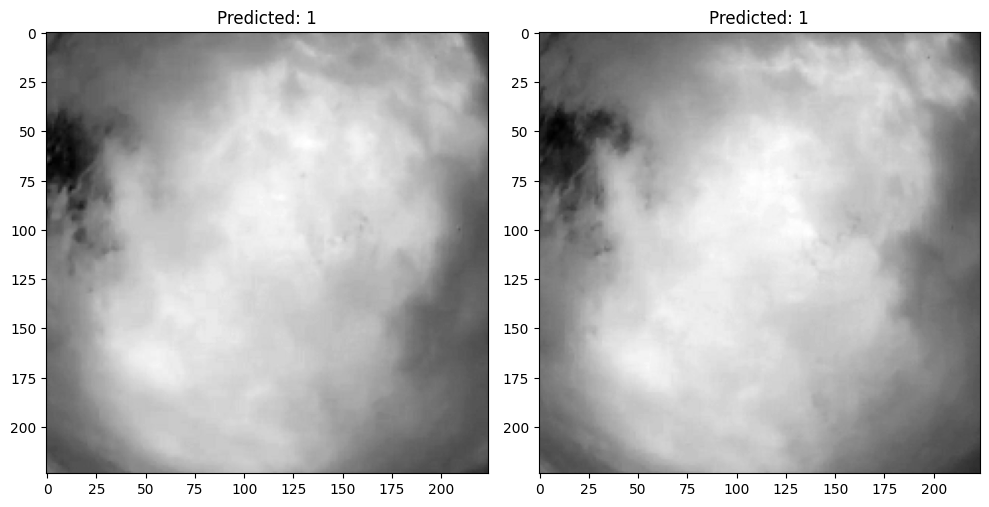

In [ ]:
import numpy as np
import os
model = tf.keras.models.load_model('/content/drive/MyDrive/soft computing/image_classifier_4_hidden.keras')
def predict_print_and_plot(model, data_dir_test, img_height, img_width):
    test_filenames = os.listdir(os.path.join(data_dir_test))
    print("Number of Test Images:", len(test_filenames))

    images = []
    for filename in test_filenames:
        filepath = os.path.join(data_dir_test, filename)
        img = tf.io.read_file(filepath)
        img = tf.io.decode_image(img, channels=1)
        img = tf.image.resize(img, [img_height, img_width])
        img_array = img / 255.0
        images.append(img_array)

    # ... (Code for loading and preprocessing images - same as before) ...

    test_images = tf.stack(images, axis=0)
    print("Shape of Test Images Tensor:", test_images.shape)
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

     # Print all predicted labels
    print("All Predicted Labels:", predicted_classes)

    # Printing Predictions + Plotting
    num_images_per_category = 2  # Display 2 images per class
    num_rows, num_cols = 1, 2  # Adjust for single row

    for label in range(num_classes):
        indices = np.where(predicted_classes == label)[0][:num_images_per_category]

        if len(indices) > 0:
            # Print in a single line
            print("Images:", ", ".join(test_filenames[i] for i in indices), end="; ")
            print("Predictions:", ", ".join(str(predicted_classes[i]) for i in indices))

            # Plotting
            fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 6))  # Modified figsize
            # Since we only have two images, no need to flatten axs

            for i, idx in enumerate(indices):
                img = test_images[idx]
                img_numpy = img.numpy()
                axs[i].imshow(img_numpy.squeeze(), cmap='gray')
                axs[i].set_title(f"Predicted: {predicted_classes[idx]}")

            plt.tight_layout()
            plt.show()

# Example Usage
predict_print_and_plot(model, data_dir_test, img_height, img_width)


Number of Images Loaded: 60
Number of Labels: 60
[1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1]
['video_file2_0_2.jpg', 'video_file2_200_2.jpg', 'video_file2_400_2.jpg', 'video_file2_600_2.jpg', 'video_file2_800_2.jpg', 'video_file2_1000_2.jpg', 'video_file2_1200_2.jpg', 'video_file2_1400_2.jpg', 'video_file2_1600_1.jpg', 'video_file2_1800_2.jpg', 'video_file2_2000_2.jpg', 'video_file2_2200_2.jpg', 'video_file2_2400_2.jpg', 'video_file2_2600_2.jpg', 'video_file2_2800_2.jpg', 'video_file2_3000_2.jpg', 'video_file2_3200_2.jpg', 'video_file2_3400_2.jpg', 'video_file2_3600_2.jpg', 'video_file2_3800_2.jpg', 'video_file2_4000_2.jpg', 'video_file2_4200_2.jpg', 'video_file2_4400_2.jpg', 'video_file2_4600_2.jpg', 'video_file2_4800_1.jpg', 'video_file2_5000_2.jpg', 'video_file2_5200_2.jpg', 'video_file2_5400_2.jpg', 'video_file2_5600_2.jpg', 'video_file2_5800_2.jp

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


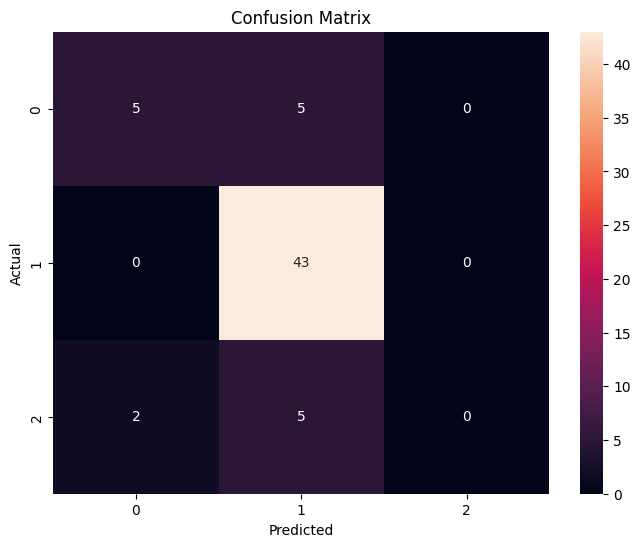

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you have the following variables defined:
# - image_data_test: A dictionary mapping filenames to true labels
# - model: A trained model for classifying images
# - data_dir_test: The directory containing the test images
# - img_height: The height of the images
# - img_width: The width of the images
def load_image_data(data_dir, image_data, img_height, img_width):
    images = []
    labels = []
    for filename, label in image_data.items():
        filepath = os.path.join(data_dir, filename) #Constructs the complete path to the image file.
        img = tf.io.read_file(filepath)
        img = tf.io.decode_image(img, channels=1)  # Grayscale
        img = tf.image.resize(img, [img_height, img_width])
        img_array = img / 255.0  # Normalize
        images.append(img_array)
        labels.append(label)

    print("Number of Images Loaded:", len(images))  # Debugging
    print("Number of Labels:", len(labels))        # Debugging `


    return images

# Get the filenames and true labels
test_filenames = list(image_data_test.keys())
true_labels = [1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
               1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1]

# Load the test images
test_images = load_image_data(data_dir_test, image_data_test, img_height, img_width)

print(true_labels)
print(test_filenames)

# Reshape the input data into a single tensor
test_images = np.array(test_images)

# Get the prediction labels
predicted_labels = model.predict(test_images)

# Convert predicted labels to integers
predicted_labels = np.argmax(predicted_labels, axis=1)

# Generate the confusion matrix and classification report
confusion_matrix = confusion_matrix(true_labels, predicted_labels)
classification_report = classification_report(true_labels, predicted_labels)

# Print the results
print("Confusion Matrix:\n", confusion_matrix)
print("\nClassification Report:\n", classification_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()